# Prezentacja implementacji rozwiązania problemu 11

## Init

In [186]:
using Plots
using LaTeXStrings

Ustawiamy rządaną precycję

In [187]:
Float64

Float64

Funkcje obliczające dla argumentu $n$ odpowiednie funkcje wielomianowe:
$$
p_n(x) = x^n - nx - nx^{-1} + x^{-n}\\
p_n(x)^\prime = n \left( x^{n-1} + \frac{1}{x^2} - x^{-n - 1} -1 \right)
$$

In [188]:
function poly(n)
    tmp(x) = x^n - n*x - n/x - 1/(x^n)
    return tmp
end

function poly_prime(n)
    tmp(x) = n * (x^(n-1) + 1/(x^2) - 1/x^(n+1) - 1)
    return tmp
end

poly_prime (generic function with 1 method)

### Implementacja metod numerycznych

##### Metoda bisekcji

In [189]:
function bisekcja(a,b,M,delta,eps,f)
    u = f(a)
    v = f(b)
    e = b-a
    
    if sign(u) == sign(v) # warunek konieczny poprawnego działania tej metody
        return (0,(a+b)/2)
    end
    
    for k = 1:M
        e = e/2
        c = a + e
        w = f(c)
                
        if abs(e) < delta || abs(w) < eps # warunki kończące iteracje metody
            return (k,c)
        end
        
        if sign(w) == sign(u) # wybieramy przedział zawierający pierwiastek
            a = c
            u = w
        else
            b = c
            v = w
        end
    end
end

bisekcja (generic function with 2 methods)

##### Metoda Newtona

In [190]:
function newton(x_0,M,delta,eps,f,f_prime)
    v = f(x_0)
    if abs(v) < eps # Warunek kończący metodę
        return (0,x_0)
    end
    
    for k = 1:M
        x_1 = x_0 - v/f_prime(x_0)
        v = f(x_1)
                
        if abs(x_1 - x_0) < delta || abs(v) < eps # Warunki kończące metodę
            return (k,x_1)
        end
        x_0 = x_1
    end
    return (M,x_0)
end

newton (generic function with 1 method)

## Zastosowanie metod do problemu 

##### Metoda bisekcji

In [191]:
interv_b = 1 # Początek przedziału poszukiwań
interv_e = Float64(3.0) # Koniec przedziału poszukiwań (Beta_0)

iteracje = Vector{Int}() # Wektor, w którym trzymamy liczbę iteracji przy obliczaniu kolejnych pierwiastków beta
beta_arr = Vector{Float64}() # Wektor z kolejnymi przybliżeniami pierwiastków beta
dbeta_arr =  Vector{Float64}() # Wektor z kolejnymi różnicą między przybliżeniami pierwiastka beta

for i = 2:30 # Obliczamy Beta_i dla i z przedziału [2,30] 
    (k,x) = bisekcja(interv_b,interv_e,100,1e-25,1e-6,poly(i))
    push!(dbeta_arr, interv_e - x)
    interv_e = x # Bety są monotonicznie malejące, zawężamy przedział poszukiwań
    push!(iteracje, k)
    push!(beta_arr, x)
end 

##### Metoda Newtona

In [192]:
beta_0 = 3 # Początkowe przybliżenie pierwiastka

iteracje2 = Vector{Int}() # Wektor, w którym trzymamy liczbę iteracji przy obliczaniu kolejnych pierwiastków beta

for i = 2:30 # Obliczamy Beta_i dla i z przedziału [2,30]
    (k,x) = newton(beta_0,100,1e-25,1e-6,poly(i),poly_prime(i))
    interv_e = x # Bety są monotonicznie malejące, zawężamy przedział poszukiwań
    push!(iteracje2, k)
end 

## Generowanie wykresów do intepretacji wykresów

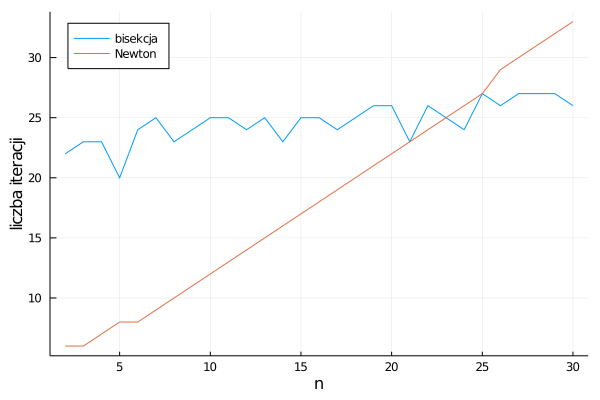

In [198]:
plot(2:30, ylab = "liczba iteracji", legend=:topleft, xlab = "n", hcat(iteracje, iteracje2), fmt=png, label = ["bisekcja" "Newton"])

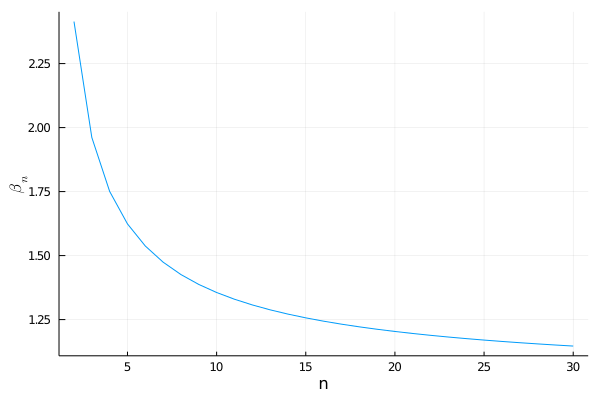

In [194]:
plot(2:30, beta_arr, xlab = "n", ylab = L"\beta_n", fmt=png, leg=false)

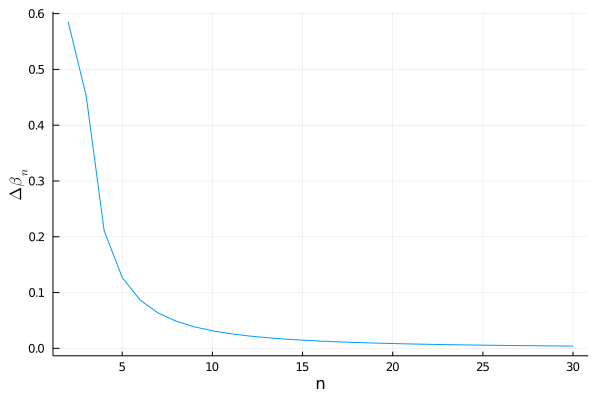

In [195]:
plot(2:30, dbeta_arr, xlab = "n", ylab = L"\Delta\beta_n", fmt=png, leg=false)